# Projekt z Sztucznych sieci neuronowych. Rafał Wójcik - 286324

In [2]:
from modelMLP import MLP, importMNIST, print_plots, print_plot, pred_score, conf_matrix, wine_load
import pandas as pd

### Spis treści

- [Wstęp](#Wstęp)
- [Opis MLP](#Opis-MLP)
- [Zbiór danych. Czym jest MNIST?](#Czym-jest-MNIST?)
- [Tworzenie oraz uczenie modelu MLP dla problemu MNIST](#Tworzenie-oraz-uczenie-modelu-MLP-dla-problemu-MNIST)
- [Analiza poprawności klasyfikacji dla MNIST](#Analiza-poprawności-klasyfikacji-dla-MNIST)
- [Zbiór danych. Czym jest Wine Data Set?](#Czym-jest-Wine-Data-Set?)
- [Tworzenie oraz uczenie modelu MLP dla problemu Wine Data Set](#Tworzenie-oraz-uczenie-modelu-MLP-dla-problemu-Wine-Data-Set)
- [Analiza poprawności klasyfikacji dla Wine Data Set](#Analiza-poprawności-klasyfikacji-dla-Wine-Data-Set)
- [Podsumowanie](#Podsumowanie)

---

# Wstęp
Implementacja modelu została zawarta w pliku modelMLP.py, tutaj będę wykorzystywał tylko niezbędne funkcję.
To pozwoli zachować przejrzystość oraz separacje kod od opisu. <ins>Model został zaimplementowany od zera.</ins>


Uznałem, że ciekawym projektem będzie napisanie wielowarstwowego perceptrony (MLP) jest to dość trudne jak na implementacje od zera. Podejmę próbę klasyfikacji obrazków MNIST, model nie jest odporny na skalowanie, rotacje oraz przesunięcia ale fakt że dysponuje sporą ilością obrazków  pozwala na wyciagnięcie zadowalających  wyników. Obrazki będą  przekształcone w wektor celem wprowadzenia do modelu, to powoduje możliwość utraty informacji płynących z relacji po między pixelami.

Drugi zestaw danych będzie związany z rodzajami Win. (Wine Data Set) gdzie problematycznym jest ilość próbek które są dostępne.

---

# Opis MLP

Połączenie wielu pojedynczych neuronów w wielowarstwową jednokierunkową sieć neuronową nazywamy MLP (ang. Multi-Layer Perceptron).

Jest to wstęp do głębokiego uczenia, natomiast uważam, że MLP które posiada tylko jedną warstwę ukrytą nie możemy zaliczyć do głębokiego uczenia. Zaimplementowałem MLP które posiada tylko jedną warstwę ukrytą.
<img src="https://a.fsdn.com/con/app/proj/neurallibs/screenshots/mlp.PNG">
[Rysunek](https://a.fsdn.com/con/app/proj/neurallibs/screenshots/mlp.PNG) powyżej przedstawia koncepcję trójwarstwowego modelu MLP. Zawiera on warstwę wejściową, warstwę ukrytą oraz warstwę wyjściową.

Jako funkcję aktywacji wykorzystuję sigmoidalną funkcję aktywacji.
<img src="https://hvidberrrg.github.io/deep_learning/activation_functions/assets/sigmoid_function.png" width="400">
\begin{equation*}
ϕ_i = ϕ_i(X_i) = \frac{1}{(1+e^{-x})}
\end{equation*}

Zaimplementowałem dwie różne funkcje kosztu, które po testach przynoszą zbliżone rezultaty:
* logistyczna funkcja kosztu
\begin{equation*}
J(w) = - \sum_{i=1}^ny^{(i)'} log(y^{(i)}) + (1-y^{(i)'})log(1-y^{(i)})\\
\end{equation*}
* błąd średniokwadratowy, funkcja ustawiona jako domyślna
\begin{equation*}
J(w) = \frac{1}{2} \sum_{i=1}^n(y^{(i)'}-y^{(i)})^2 \\
y' \text{- oczekiwana wartość} \\
y \text{- wyliczona wartość przez model}
\end{equation*}

***
\begin{equation*}
A^{(1)} \quad\quad \text{(etykiety)}\\
W^{(1)} \quad\quad \text{(wagi dla etykiet)}
\end{equation*}

\begin{equation*}
Z^{(2)} = W^{(1)}[A^{(1)}]^T  \quad\quad \text{(całkowite pobudzenie warstwy ukrytej)}\\
A^{(2)} = \phi(Z^{(2)})  \quad\quad \text{(aktywacja warstwy ukrytej)}\\
Z^{(3)} = W^{(2)}A^{(2)}  \quad\quad \text{(calkowite pobudzenie warstwy wyjściowej)}\\
A^{(3)} = \phi(Z^{(3)})  \quad\quad \text{(aktywacja warstwy wyjściowej)}
\end{equation*}

\begin{equation*}
\text{Wektor błędu dla warstwy wyjściowej:}\\
δ^{(3)} = A^{(3)}-y\\
\text{Parametr y jest wektorem rzeczywistych etykiet klas.}\\
\end{equation*}

\begin{equation*}
\text{Błąd dla warstwy ukrytej:}\\
δ^{(2)} = (W^{(2)})^Tδ^{(3)}*\frac{\partialϕ(Z^{(2)})}{Z^{(2)}}\\
\text{Gdzie } \frac{\partialϕ(Z^{(2)})}{Z^{(2)}} \text{ to pochodna funkcja aktywacji.}\\
\frac{\partialϕ(Z^{(2)})}{Z^{(2)}} = (A^{(2)}*(1-A^{(2)}))
\end{equation*}

\begin{equation*}
\text{Pochodna cząstkowa każdego j-tego węzła w warstwie $l$ oraz i-ty błąd z warstwy $l$+1:}\\
Δ_{i,j}^{(l)}:=Δ_{i,j}^{(l)}+A_j^{(l)}δ_i^{(l+1)}
\end{equation*}

\begin{equation*}
\text{Aktualizacja wag, wykonując krok w kierunku przeciwnym do gradientu:}\\
W^{(l)}:=W^{(l)}-μΔ^{(l)}
\end{equation*}

Do tego podstawowego schematu dodałem:
- regularyzacja L1, L2 
\begin{equation*}
L1 = λ\sum_{j=1}^m |w_j| \quad\quad L2 = λ\sum_{j=1}^m w_j^2
\end{equation*}
- współczynnik momentu
\begin{equation*}
Δw_t = μ \nabla J (w_t)+αΔw_{t-1}
\end{equation*}

---

# Czym jest MNIST?
Zestaw danych MNIST został utworzony z dwóch zbiorów amerykańskiego Narodowego Instytutu Standaryzacji i Technologii. Na dane składają się ręcznie zapisane cyfry od 250 osób. Połowa próbek została utworzona przez uczniów szkoły średniej, a druga przez pracowników amerykańskiego Biura Cenzusowego.

Cyfry te są obrazkami 28x28 pixeli. Całą pula to 70.000 różnych obrazków. Podzielę je na 60.000 do nauki modelu oraz 10.000 do testowania osiągnięć.
Każdy obrazek ma przypisaną etykietę z cyfrą którą przedstawia.

Zbiór ten jest stosowany do testowania modeli oraz do rywalizacji po między zespołami którzy starają się osiągnąć na nim jak najmniejszy błąd. Aktualnie najlepszy wynik jaki udało się osiągnąć na tym zbiorze to błąd [0.21%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html). Lecz są to modele wykorzystujące głębokie uczenie. Warto wspomnieć o czasie jaki był potrzebny do wyuczenia takiego modelu. Do osiągnięcia tak niskiego błędu [model](http://people.idsia.ch/~ciresan/data/cvpr2012.pdf) uczył się 14 godzin w ciągu których wykonał 800 epok.

| Train|Test
|-----|--------
|60000|10000


In [7]:
(X_train, y_train), (X_test, y_test) = importMNIST()

Obrazki przezentują się w taki sposób.

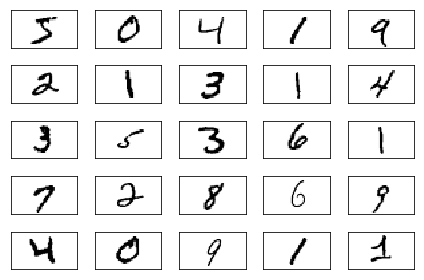

In [4]:
print_plots(X_train)

---

# Tworzenie oraz uczenie modelu MLP dla problemu MNIST

Parametry dobierałem na oko, niestety nie istnieją wzorce mówiące jak to robić optymalnie.

In [5]:
mlp = MLP(n_output=10,                 # liczba etykiet
          n_features=X_train.shape[1]  # liczba cech
          ,n_hidden=50,                # liczba neuronow w warstwie ukrytej
          l1=0.1, l2=0,                # wspolczynniki regularyzacji
          epochs=800,                  # liczba epok
          eta=.001                     # wspołczynnik uczenia
          ,eta_val=.00001,             # współczynnik zmiany ety
          batches=50,                  # modtfikacja co k-ty wektor 
          alpha=.001                   # wpsolczynnik momentu
         )

Obrazki zostają zmienione z macierzy 28x28 na wektory o długości 784.

Tworze model o strukturze:

| Warstwa|Wejsciowa | Ukryta | Wyjściowa
|--------|----------|--------|----------
|Ilość neuronów|784|50|10

Po zaimplementowaniu przystąpię do nauki modelu wykorzystując 60.000 obrazków.

In [8]:
mlp.fit(X_train, y_train)

Epoka: 800/800, time: 22.43m

<modelMLP.MLP instance at 0x0DC5E198>

---

# Analiza poprawności klasyfikacji dla MNIST

Po wytrenowaniu modelu możemy zobazyć jak sobie radzi z danymi.

Poniżej prezentuje się wykres przebiegu spadku wartości funkcji kosztu:

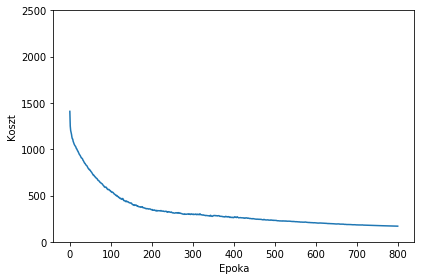

In [9]:
print_plot(mlp)

Model bez większych problemów dążył do osiągnięcia minimum. Teraz można sprawdzić jak sobie poradzi z danymi na jakich był testowany i których jeszcze nie widział.

In [10]:
pred_score(X_train, y_train, X_test, y_test, mlp)

Dane treningowe: 97.68%
Dane testowe: 96.15%


Wyniki są zadowalające biorąc pod uwagę iż model potrzebował niecałych 23 minut na domowym komputerze w ciągu których wykonał 800 epok.

Sprawdźmy z jakimi cyframi model miał problem.

T - poprawca cyfra

P - klasyfikacja przez model

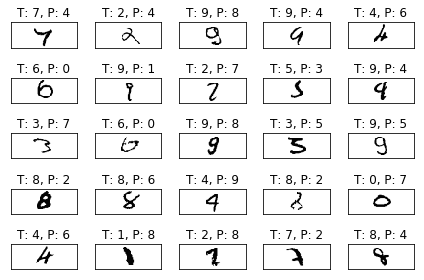

In [9]:
y = mlp.predict(X_test)
print_plots(X_test,y_test,y, show=True)

Warto zobaczyć jak wygląda macierz konfuzji.

In [10]:
conf_matrix(y_test,y)

,0,1,2,3,4,5,6,7,8,9
0,966,1,2,1,1,1,4,2,1,1
1,0,1121,1,3,0,0,3,0,7,0
2,8,1,991,4,9,1,0,12,5,1
3,2,0,8,974,1,8,1,7,8,1
4,1,1,2,1,945,0,9,2,3,18
5,5,2,3,14,0,840,12,2,9,5
6,5,3,5,1,7,7,929,0,1,0
7,4,3,21,5,4,0,0,978,0,13
8,8,1,3,5,7,5,12,4,927,2
9,9,7,1,12,17,8,1,6,4,944


Najczęściej mylił się z 7 uznając ją jako 2. Faktycznie te liczby potrafią wyglądać podobnie. Równiej pare 4 uznawał za 9 i 9 za 4.

---

# Czym jest Wine Data Set?

Jest to zbiór danych zawierające informacje na temat różnych chemicznych cech wina.
A dokładnie:
* Alkohol
* Kwas jabłkowy
* Popiół
* Zasadowość popiołu
* Magnez 
* Całk. zaw. fenoli
* Flawonoidy
* Fenole nieflawonoidowe
* Proantocyjaniny
* Intensywność koloru
* Odcień
* Transmitancja 280/315 nm
* Prolina

Mamy podział na 3 etykiety.

In [3]:
X_train, y_train, X_test, y_test = wine_load()

In [4]:
c = ['Alkohol','Kwas jabłkowy','Popiół','Zasadowość popiołu','Magnez','Całk. zaw. fenoli','Flawonoidy',
       'Fenole nieflawonoidowe','Proantocyjaniny','Intensywność koloru','Odcień','Transmitancja 280/315 nm','Prolina']
pd.DataFrame(X_train[:5], columns=c)

,Alkohol,Kwas jabłkowy,Popiół,Zasadowość popiołu,Magnez,Całk. zaw. fenoli,Flawonoidy,Fenole nieflawonoidowe,Proantocyjaniny,Intensywność koloru,Odcień,Transmitancja 280/315 nm,Prolina
0,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.8,0.89,2.87,1285.0
1,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.6,1.19,2.30,678.0
2,13.83,1.57,2.62,20.0,115.0,2.95,3.40,0.40,1.72,6.6,1.13,2.57,1130.0
3,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.0,0.60,1.68,830.0
4,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.4,1.00,3.17,510.0


Wagi pomiędzy sobą potrafią się bardzo różnić skalą, dlatego warto je ustandaryzować.

Standaryzacja polega na wprowadzeniu do kolumny cech średnią 0 przy odchyleniu standardowym 1. Dzięki temu otrzymujemy rozkład normalny ułatwiający naukę.

\begin{equation*}
x_{std}^{(i)} = \frac{x^{(i)}-μ_x}{\sigma_x} \\
x_{std} \text{ - ustandaryzowana wartość} \\
x \text{ - wartość do ustandaryzowania} \\
μ_x \text{ - średnia próbek z danej kolumny} \\
\sigma_x \text{ - odchylenie standardowe z danej kolumny}
\end{equation*}

In [5]:
from sklearn.preprocessing import scale
X_train, X_test = scale(X_train), scale(X_test)

Zobaczmy jak teraz wyglądają wartości.

In [6]:
pd.DataFrame(X_train[:5], columns=c)

,Alkohol,Kwas jabłkowy,Popiół,Zasadowość popiołu,Magnez,Całk. zaw. fenoli,Flawonoidy,Fenole nieflawonoidowe,Proantocyjaniny,Intensywność koloru,Odcień,Transmitancja 280/315 nm,Prolina
0,0.938990,-0.874182,0.518202,-0.882528,0.711115,1.798179,1.662210,-1.440383,0.817769,0.705929,-0.238218,0.441107,1.934407
1,-0.776350,-1.063511,0.732729,-0.463796,-0.059046,0.252014,0.658745,0.011291,0.886760,-0.218539,1.025019,-0.360820,-0.116619
2,1.078758,-0.753700,0.947256,0.104484,1.250227,1.088205,1.396587,0.253236,0.265844,0.621887,0.772371,0.019040,1.410669
3,0.227441,0.967469,-0.733206,0.403578,0.249019,-1.199487,-1.407212,0.495182,-0.458558,-0.470666,-1.459348,-1.233092,0.396982
4,-0.928825,-0.616006,-0.840470,-0.194611,-1.445335,-0.962829,0.048796,0.011291,0.110615,-0.722794,0.224969,0.863174,-0.684284


Ten zabieg powinien bardzo ułatwić naukę naszego modelu. 

---

# Tworzenie oraz uczenie modelu MLP dla problemu Wine Data Set

In [7]:
mlp = MLP(n_output=3,                  # liczba etykiet
          n_features=X_train.shape[1]  # liczba cech
          ,n_hidden=10,                # liczba neuronow w warstwie ukrytej
          l1=0.1, l2=0.1,              # wspolczynniki regularyzacji
          epochs=1000,                 # liczba epok
          eta=.001                     # wspołczynnik uczenia
          ,eta_val=.00001,             # współczynnik zmiany ety
          batches=5,                   # modtfikacja co k-ty wektor 
          alpha=.001                   # wpsolczynnik momentu
         )

Tworze model o strukturze:

| Warstwa|Wejsciowa | Ukryta | Wyjściowa
|--------|----------|--------|----------
|Ilość neuronów|13|10|3

In [8]:
mlp.fit(X_train, y_train)

Epoka: 1000/1000, time: 0.1m

<modelMLP.MLP instance at 0x0DA233C8>

Nauka w tym przypadku nauka jest wręcz błyskawiczna, powodem jest  znacznie mniejsza ilości wag do zmian. Nauka trwała 1s.

# Analiza poprawności klasyfikacji dla Wine Data Set

Zobaczmy jak wygląda wykres spadku wartości błędu.

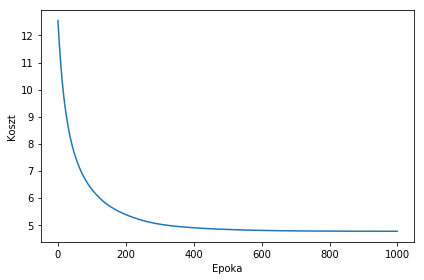

In [103]:
print_plot(mlp)

Model osiągną minimum już w 800 epoce.

In [11]:
pred_score(X_train, y_train, X_test, y_test, mlp)
y = mlp.predict(X_test)
conf_matrix(y_test,y,c =['True class 1','True class 2','True class 3'],
            i =['Pred. class 1','Pred. class 2','Pred. class 3'] )

Dane treningowe: 98.67%
Dane testowe: 92.86%


,True class 1,True class 2,True class 3
Pred. class 1,14,1,0
Pred. class 2,0,9,1
Pred. class 3,0,0,3


Tylko dwa przypadki sklasyfikował nie poprawnie.

# Podsumowanie
Zaimplementowany przeze mnie model radzi sobie dobrze z klasyfikacją cech Win jak i w rozpoznawaniu cyfr na małych obrazkach, co udowadniają powyższe przykłady. Wielkość stworzonej sieci i dobranie odpowiednich parametrów ma kluczowe znaczenie dla wydajności i czasu nauki modelu.

Należy pamiętać że odpowiedni model to jedno, złe przygotowane dane mogą uniemożliwić modelowi nauczenia się ich, należy zwracać uwagę czy dane nie posiadają luk, wartości NULL. Warto również stosować standaryzacje oraz normalizacje.